In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the Excel file
file_path = 'PAS_T&Cdashboard_to Q3 23-24.xlsx'
excel_data = pd.ExcelFile(file_path)

# Load the "MPS" sheet into a DataFrame
df_mps = excel_data.parse('MPS')

# Display the first few rows to understand the structure
print(df_mps.head())

        Date Survey Borough                Measure  Proportion
0 2014-12-31    PAS     MPS       "Good Job" local        0.67
1 2014-12-31    PAS     MPS   Contact ward officer        0.41
2 2014-12-31    PAS     MPS         Informed local        0.49
3 2014-12-31    PAS     MPS     Listen to concerns        0.74
4 2014-12-31    PAS     MPS  Relied on to be there        0.77


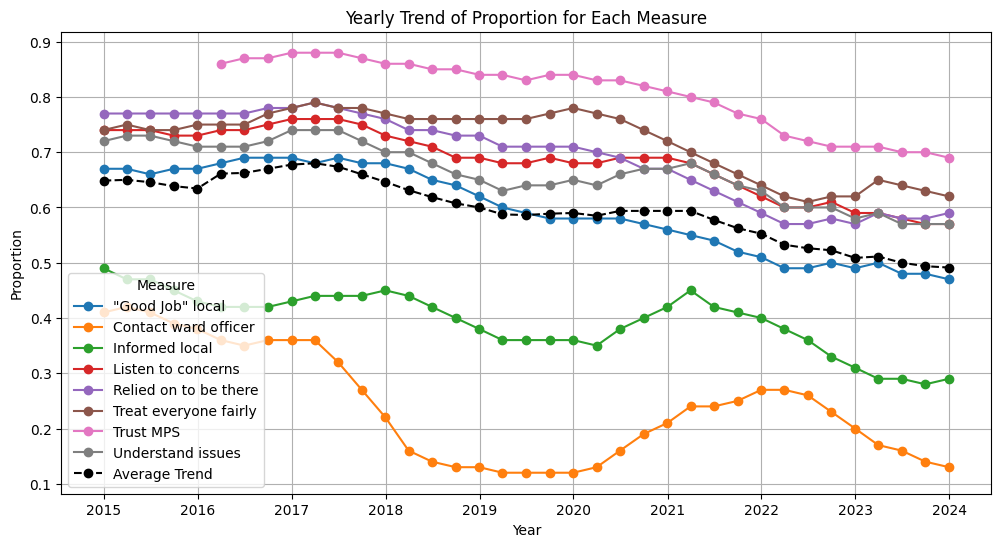

In [3]:
pivot_table = df_mps.pivot(index='Date', columns='Measure', values='Proportion')
measures = pivot_table.columns


# Plot the data
average_trend = pivot_table.mean(axis=1)
plt.figure(figsize=(12, 6))
for column in pivot_table.columns:
    plt.plot(pivot_table.index, pivot_table[column], marker='o', label=column)
plt.plot(average_trend.index, average_trend, marker='x', linestyle='--', color='black', label='Average Trend')
plt.title('Yearly Trend of Proportion for Each Measure')
plt.xlabel('Year')
plt.ylabel('Proportion')
plt.legend(title='Measure')
plt.grid(True)
plt.show()

In [13]:
df_borough = excel_data.parse('Borough')
df_borough['Borough'] = df_borough['Borough'].replace('Richmond Upon Thames', 'Richmond upon Thames')
df_borough.head()


,Date,Survey,Borough,Measure,Proportion,MPS,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,2014-12-31,PAS,Barking and Dagenham,"""Good Job"" local",0.56,0.67,NaN,NaN,NaN,NaN
1,2014-12-31,PAS,Barnet,"""Good Job"" local",0.67,0.67,NaN,NaN,NaN,NaN
2,2014-12-31,PAS,Bexley,"""Good Job"" local",0.72,0.67,NaN,NaN,NaN,NaN
3,2014-12-31,PAS,Brent,"""Good Job"" local",0.66,0.67,NaN,NaN,NaN,NaN
4,2014-12-31,PAS,Bromley,"""Good Job"" local",0.71,0.67,NaN,NaN,NaN,NaN


In [16]:
pivot_table2 = df_borough.pivot(index=['Borough','Date' ], columns='Measure', values='Proportion')


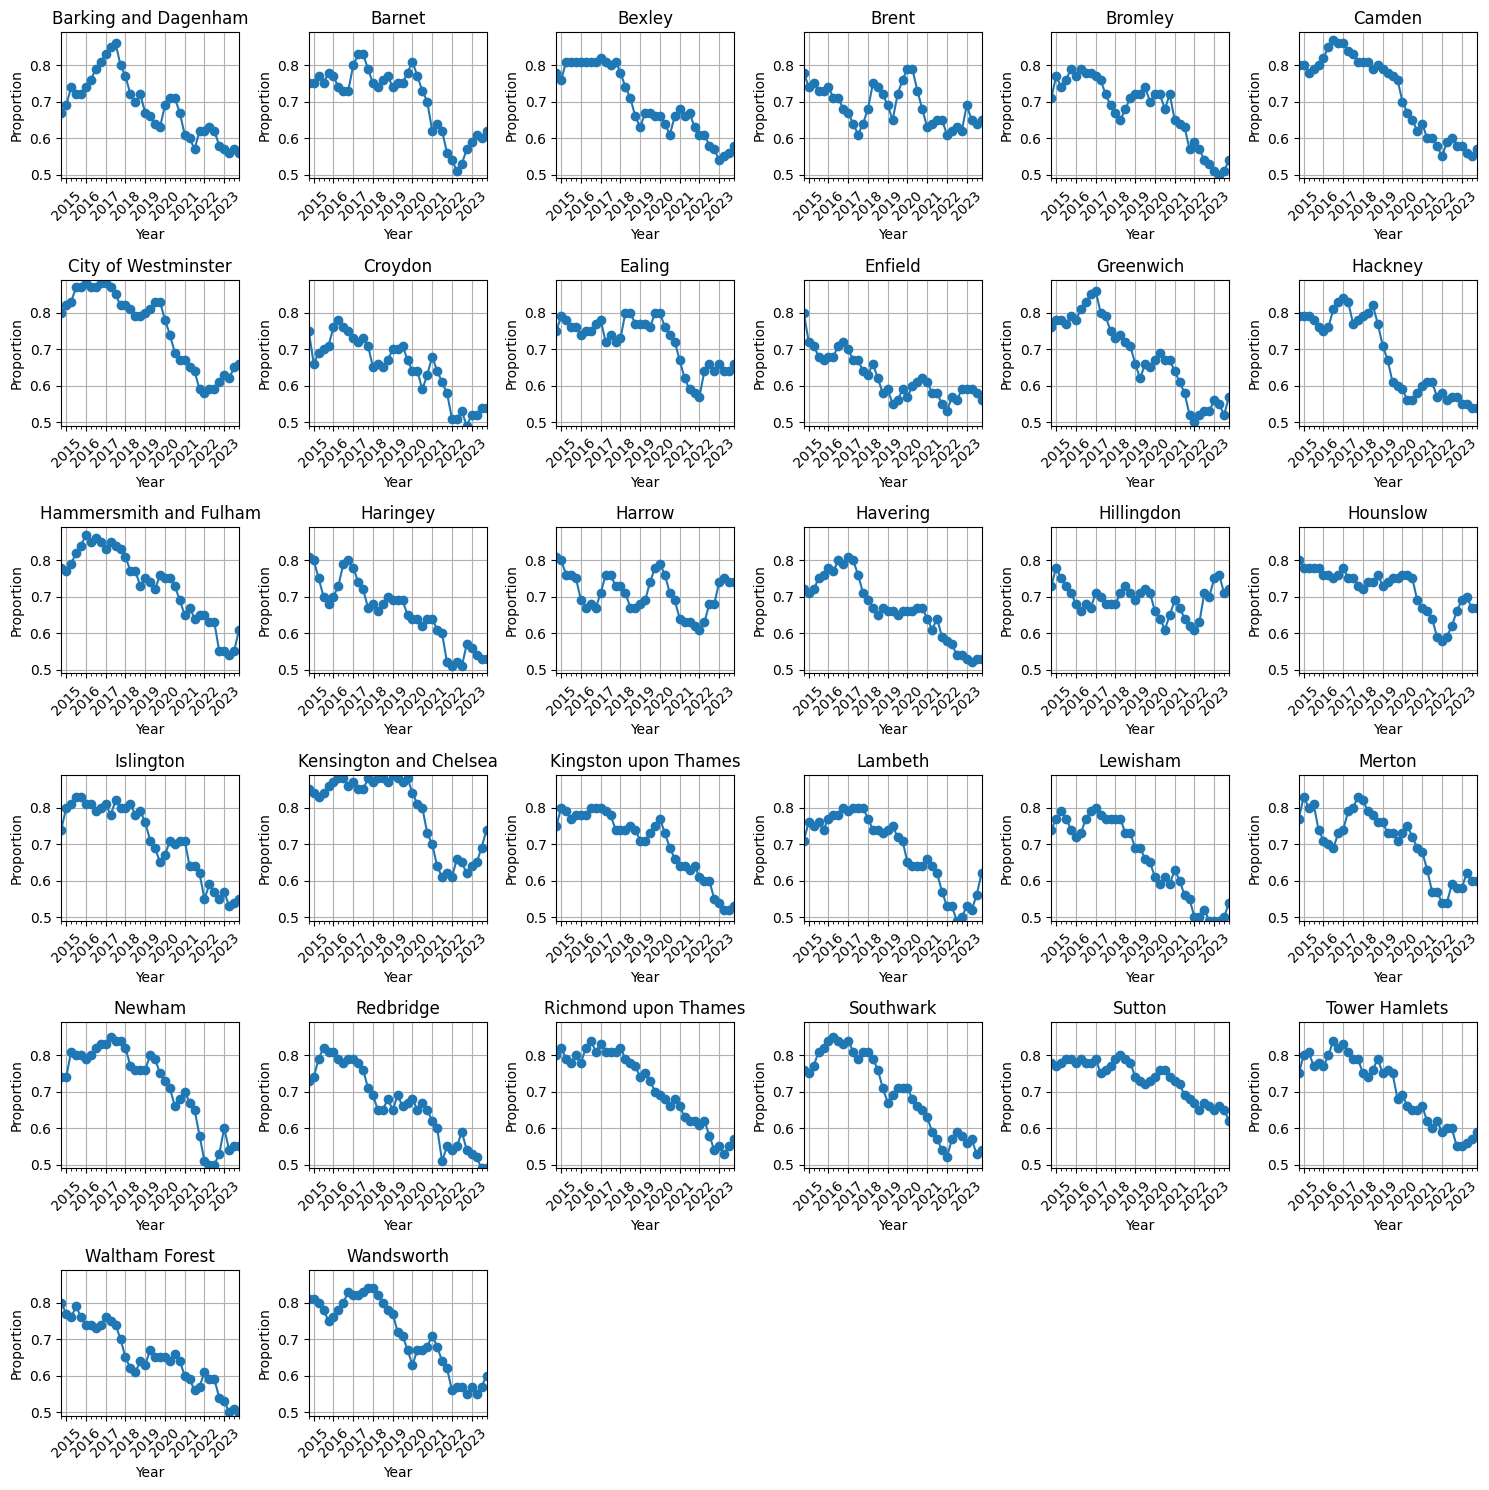

In [19]:
# Assuming pivot_table2 is your DataFrame
boroughs = pivot_table2.index.get_level_values(0).unique()

# Calculate the number of rows and columns needed for a square layout
num_boroughs = len(boroughs)
cols = int(np.ceil(np.sqrt(num_boroughs)))
rows = int(np.ceil(num_boroughs / cols))
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(15, 15))

y_min = pivot_table2['Relied on to be there'].min().min()
y_max = pivot_table2['Relied on to be there'].max().max()

for i, borough in enumerate(boroughs):
    row, col = divmod(i, cols)
    ax = axes[row, col]
    pivot_table2.xs(borough, level=0)['Relied on to be there'].plot(marker='o', ax=ax)
    ax.set_title(f'{borough}')
    ax.set_xlabel('Year')
    ax.set_ylabel('Proportion')
    ax.set_ylim(y_min, y_max)
    ax.grid(True)
    for tick in ax.get_xticklabels():
        tick.set_rotation(45) 

# Remove empty subplots
for j in range(i + 1, rows * cols):
    fig.delaxes(axes.flat[j])

plt.tight_layout()
plt.show()




In [106]:
df2 = pd.read_csv('combined_data.csv')
df2.columns
# Identify the Borough for each row
borough_columns = df2.columns[df2.columns.str.startswith('Borough_')]

def get_borough(row):
    for col in borough_columns:
        if row[col] == 1:
            return col.replace('Borough_', '')
    return 'None'

df2['Borough'] = df2.apply(get_borough, axis=1)

# Filtering out rows where Borough is 'None'
df2 = df2[df2['Borough'] != 'None']


#df2 = df2[df2['Y'] > 20]

df2 = df2.sort_values('Borough')

df1 = pivot_table2.reset_index()

df1['Y'] = df1['Relied on to be there'] * 100
#df1 = df1[df1['Y'] > 20]
df1.head()

Measure,Borough,Date,"""Good Job"" local",Contact ward officer,Informed local,Listen to concerns,Relied on to be there,Treat everyone fairly,Trust MPS,Understand issues,Y
0,Barking and Dagenham,2014-12-31,0.56,0.36,0.44,0.69,0.67,0.71,NaN,0.63,67.0
1,Barking and Dagenham,2015-03-31,0.57,0.33,0.46,0.67,0.69,0.74,NaN,0.66,69.0
2,Barking and Dagenham,2015-06-30,0.61,0.29,0.41,0.68,0.74,0.76,NaN,0.69,74.0
3,Barking and Dagenham,2015-09-30,0.61,0.30,0.44,0.70,0.72,0.76,NaN,0.71,72.0
4,Barking and Dagenham,2015-12-31,0.66,0.29,0.44,0.72,0.72,0.76,NaN,0.72,72.0


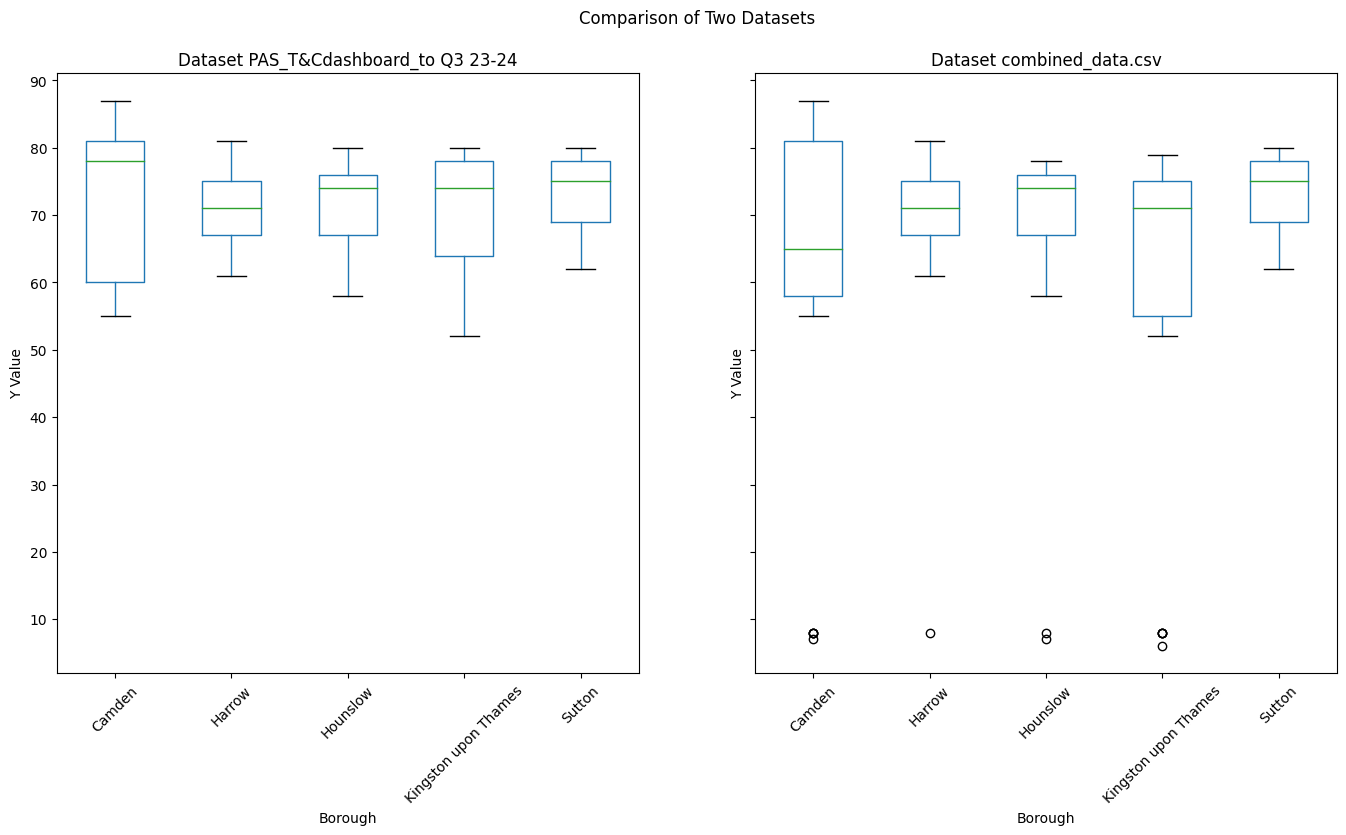

(array(['Barking and Dagenham'], dtype=object), array([], dtype=object))

In [116]:

df2['Borough'] = df2['Borough'].replace('Kingston', 'Kingston upon Thames')
df2['Borough'] = df2['Borough'].replace('Richmond', 'Richmond upon Thames')
df2['Borough'] = df2['Borough'].replace('Westminster', 'City of Westminster')
df1['Borough'] = df1['Borough'].replace('Richmond Upon Thames', 'Richmond upon Thames')

# Randomly selecting 5 boroughs from each dataframe
selected_boroughs_df1 = df1['Borough'].drop_duplicates().sample(5, random_state=3)

# Filtering the dataframes to only include the selected boroughs
df1_subset = df1[df1['Borough'].isin(selected_boroughs_df1)]
df2_subset = df2[df2['Borough'].isin(selected_boroughs_df1)]

# Sorting the subsets by Borough alphabetically
df1_subset = df1_subset.sort_values('Borough')
df2_subset = df2_subset.sort_values('Borough')

# Plotting overlapping box plots for the subsets
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 8), sharey=True)
df1_subset.boxplot(column='Y', by='Borough', grid=False, ax=axes[0])
df2_subset.boxplot(column='Y', by='Borough', grid=False, ax=axes[1])

# Setting titles and labels
axes[0].set_title('Dataset PAS_T&Cdashboard_to Q3 23-24')
axes[1].set_title('Dataset combined_data.csv')
for ax in axes:
    ax.set_xlabel('Borough')
    ax.set_ylabel('Y Value')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.suptitle('Comparison of Two Datasets')
plt.show()

# Finding boroughs present in df1 but not in df2
unique_boroughs_df1 = df1[~df1['Borough'].isin(df2['Borough'])]['Borough'].unique()

# Finding boroughs present in df2 but not in df1
unique_boroughs_df2 = df2[~df2['Borough'].isin(df1['Borough'])]['Borough'].unique()

unique_boroughs_df1, unique_boroughs_df2

<Figure size 1400x800 with 0 Axes>

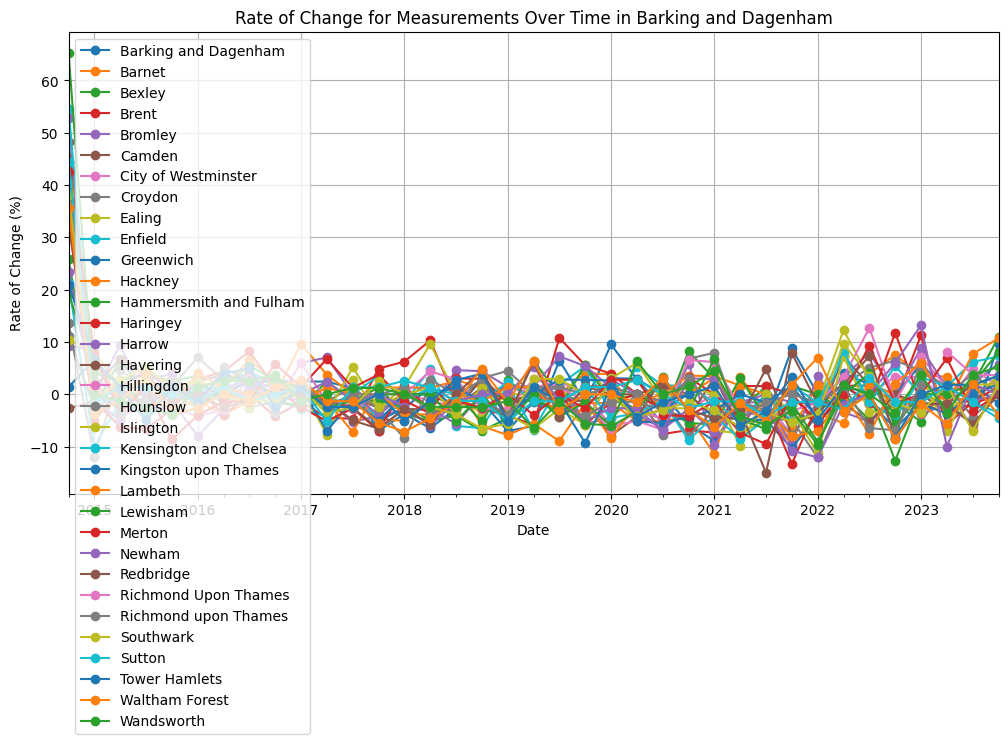

In [86]:
df_pct_change = pivot_table2.pct_change().dropna() * 100
plt.figure(figsize=(14, 8))
df_pct_change['Relied on to be there'].unstack(level=0).plot(marker='o', figsize=(12, 6))
plt.xlabel('Date')
plt.ylabel('Rate of Change (%)')
plt.title('Rate of Change for Measurements Over Time in Barking and Dagenham')
plt.legend()
plt.grid(True)
plt.show()

In [87]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.palettes import Category10
from bokeh.layouts import column
from bokeh.io import push_notebook
from bokeh.models import Legend

# Filter the data to include only dates after 2017
#df_filtered = pivot_table2[pivot_table2.index.get_level_values('Date') > '2017-12-31']

# Calculate percentage change
df_pct_change = pivot_table2.pct_change().dropna() * 100

# Convert index to columns for Bokeh
df_pct_change.reset_index(inplace=True)

# Output to notebook
output_notebook()

# Create a figure
p = figure(x_axis_type='datetime', title='Rate of Change for Trust MPS Over Time (After 2017)', height=400, width=800)
p.xaxis.axis_label = 'Date'
p.yaxis.axis_label = 'Rate of Change (%)'

# Define a color palette
colors = Category10[10]
p.line(df_pct_change['Date'], 0, line_width=2, line_color="black")
legend_items = []
# Add lines and hover tool for each borough
for idx, (borough, group) in enumerate(df_pct_change.groupby('Borough')):
    source = ColumnDataSource(group)
    line = p.line('Date', 'Relied on to be there', source=source, legend_label=borough, line_width=2, color=colors[idx % len(colors)])
    circle = p.circle('Date', 'Relied on to be there', source=source, fill_color=colors[idx % len(colors)], size=6)
    legend_items.append((borough, [line, circle]))



# Add hover tool
hover = HoverTool()
hover.tooltips = [("Date", "@Date{%F}"), ("Measurement", 'Relied on to be there'), ("Value", "@{Trust MPS}{0.2f}"), ("Borough", "@Borough")]
hover.formatters = {'@Date': 'datetime'}
p.add_tools(hover)

p.legend.location = "top_left"
p.legend.click_policy = "hide"

# Show the plot
show(p, notebook_handle=True)

Loading BokehJS ...

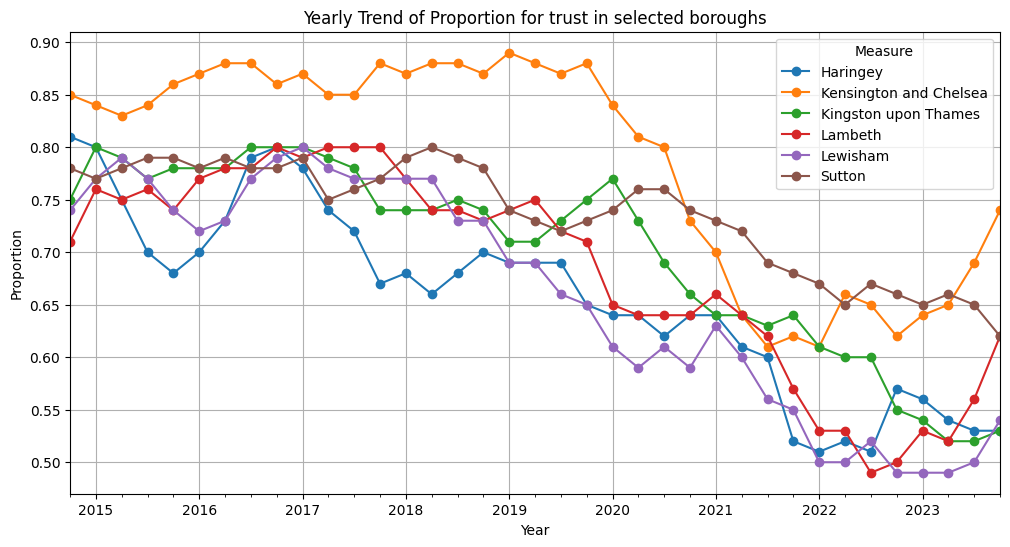

In [88]:
interest_bor = ['Kingston upon Thames', 'Haringey', 'Sutton', 'Kensington and Chelsea', 'Westminster', 'Lambeth', 'Lewisham']
df_borough_inter = df_borough[df_borough['Borough'].isin(interest_bor)]
pivot_table3 = df_borough_inter.pivot(index=['Borough','Date' ], columns='Measure', values='Proportion')
pivot_table3.head()

pivot_table3['Relied on to be there'].unstack(level=0).plot(marker='o', figsize=(12, 6))
plt.title('Yearly Trend of Proportion for trust in selected boroughs')
plt.xlabel('Year')
plt.ylabel('Proportion')
plt.legend(title='Measure')
plt.grid(True)
plt.show()

In [24]:
df = pd.read_csv('combined_data.csv')
df.head()

,"Proportion ""Good Job"" local",Proportion Contact ward officer,Proportion Informed local,Proportion Listen to concerns,Y,Proportion Treat everyone fairly,Proportion Trust MPS,Proportion Understand issues,stops_cleaned_Search Type_STOP_SEARCH,strengths_cleaned_Rank Constable,...,Borough_Merton,Borough_Newham,Borough_Redbridge,Borough_Richmond,Borough_Southwark,Borough_Sutton,Borough_Tower Hamlets,Borough_Waltham Forest,Borough_Wandsworth,Borough_Westminster
0,56.0,36.0,44.0,69.0,67.0,71.0,74.43457,63.0,1.0,37647.94898,...,0,0,0,0,0,0,0,0,0,0
1,67.0,38.0,46.0,73.0,75.0,74.0,74.43457,73.0,1.0,37647.94898,...,0,0,0,0,0,0,0,0,0,0
2,72.0,36.0,52.0,78.0,78.0,78.0,74.43457,77.0,1.0,37647.94898,...,0,0,0,0,0,0,0,0,0,0
3,66.0,36.0,41.0,78.0,78.0,76.0,74.43457,77.0,1.0,37647.94898,...,0,0,0,0,0,0,0,0,0,0
4,71.0,41.0,56.0,76.0,71.0,66.0,74.43457,71.0,1.0,37647.94898,...,0,0,0,0,0,0,0,0,0,0


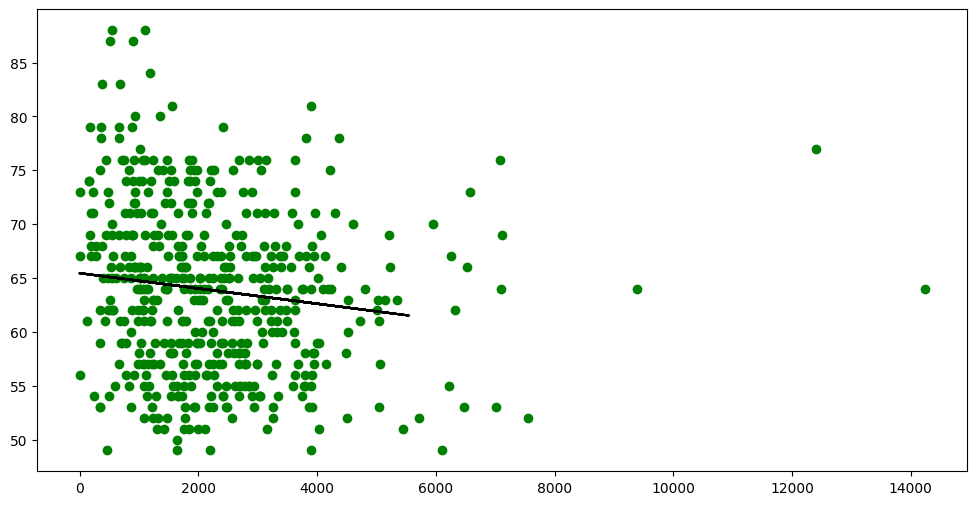

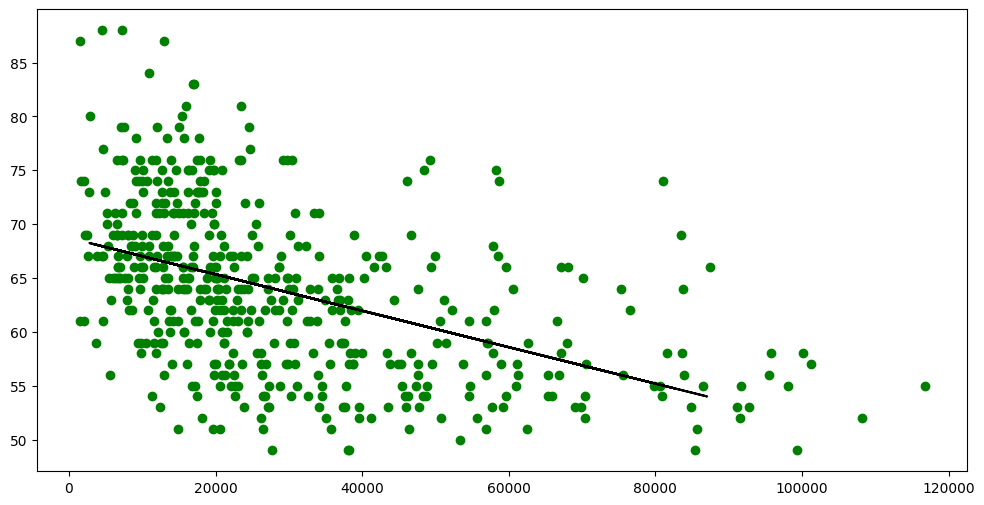

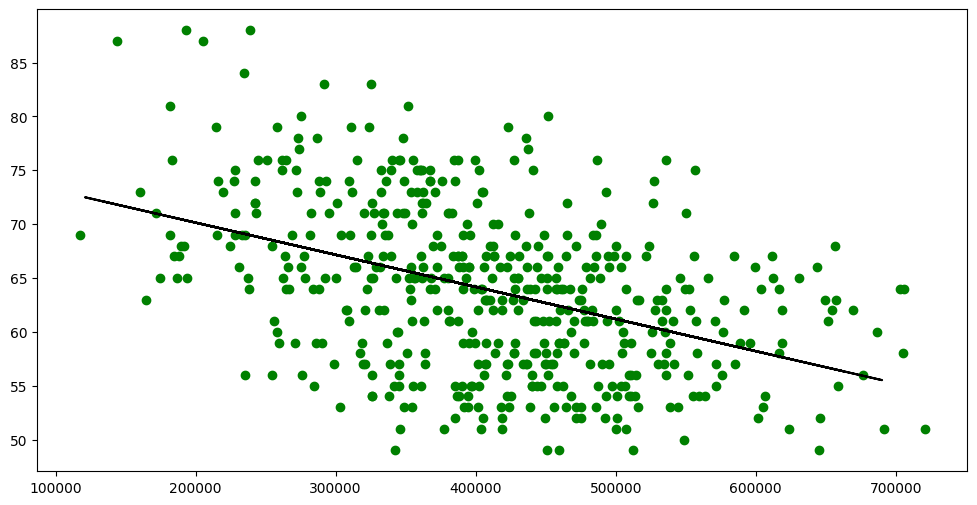

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
#plot measures against time_spent_cleaned_Abstraction Type_Court and time_spent_cleaned_Abstraction Type_Training
court_col = 'time_spent_cleaned_Abstraction Type_Court_lag'
training_col = 'time_spent_cleaned_Abstraction Type_Training_lag'
not_abstacted_col = 'time_spent_cleaned_Abstraction Type_Not Abstracted_lag'
trust_col = 'Y'

df = df[df['Y'] > 20]
df.drop_duplicates(inplace=True, subset=[court_col, training_col, not_abstacted_col, ], keep='first')

# Plot for Court
plt.figure(figsize=(12, 6))
#plt.scatter(df[court_col], df[trust_col], label='Court', color='#0072B2')

#df.reset_index(inplace=True)

X = df[[court_col]].values
y = df[[trust_col]].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()
y_pred = regressor.predict(X_test)
plt.scatter(X_train, y_train,color='g')
plt.plot(X_test, y_pred,color='k')

plt.show()

# X_court = df[court_col].values.reshape(-1, 1)
# y = df[trust_col].values
# reg_court = LinearRegression().fit(X_court, y)
# trend_court = reg_court.predict(X_court)
# plt.plot(df[court_col], trend_court, color='#0072B2', linestyle='--')

# plt.title('Scatter Plot of Court against Trust')
# plt.xlabel('Court')
# plt.ylabel('Trust')
# plt.legend(title='Court')
# plt.grid(True)
# plt.show()

# Plot for Training
plt.figure(figsize=(12, 6))
#plt.scatter(df[training_col], df[trust_col], label='Training', color='#D55E00')

X = df[[training_col]].values
y = df[trust_col].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()
y_pred = regressor.predict(X_test)
plt.scatter(X_train, y_train,color='g')
plt.plot(X_test, y_pred,color='k')

plt.show()

# X_training = df[training_col].values.reshape(-1, 1)
# reg_training = LinearRegression().fit(X_training, y)
# trend_training = reg_training.predict(X_training)
# plt.plot(df[training_col], trend_training, color='#D55E00', linestyle='--')
# plt.title('Scatter Plot of Training against Trust')
# plt.xlabel('Training')
# plt.ylabel('Trust')
# plt.legend(title='Training')
# plt.grid(True)
# plt.show()

# Plot for Policing
plt.figure(figsize=(12, 6))
#plt.scatter(df[not_abstacted_col], df[trust_col], label='Policing', color='#009E73')

X = df[[not_abstacted_col]].values
y = df[trust_col].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()
y_pred = regressor.predict(X_test)
plt.scatter(X_train, y_train,color='g')

plt.plot(X_test, y_pred,color='k')
# X_not_abstacted = df[not_abstacted_col].values.reshape(-1, 1)
# reg_not_abstacted = LinearRegression().fit(X_not_abstacted, y)
# trend_not_abstacted = reg_not_abstacted.predict(X_not_abstacted)
# plt.plot(df[not_abstacted_col], trend_not_abstacted, color='#009E73', linestyle='--')
# plt.title('Scatter Plot of Policing against Trust')
# plt.xlabel('Policing')
# plt.ylabel('Trust')
# plt.legend(title='Policing')
# plt.grid(True)
# plt.show()


In [27]:
excel_data2 = pd.ExcelFile('ethnic-groups-by-borough.xls')
ethnic = excel_data2.parse('2020')
columns = ['Code', 'Area', 'White', 'Asian', 'Black', 'Mixed/Other', 'Total', 'CI', 'White_CI', 'Asian_CI', 'Black_CI', 'Mixed/Other_CI', 'Total_CI']

# Update the dataframe with the correct column headers
ethnic.columns = columns

# Remove the first row that has redundant headers and the second row which is all NaN
ethnic = ethnic.drop([0, 1])

# Reset the index of the dataframe
ethnic = ethnic.reset_index(drop=True)
#ethnic.dropna(inplace=True)

# Display the cleaned dataframe
ethnic.head()


,Code,Area,White,Asian,Black,Mixed/Other,Total,CI,White_CI,Asian_CI,Black_CI,Mixed/Other_CI,Total_CI
0,E09000001,City of London,-,-,-,-,-,NaN,-,-,-,-,-
1,E09000002,Barking and Dagenham,99000,55000,51000,16000,222000,NaN,14000,12000,11000,6000,22000
2,E09000003,Barnet,255000,79000,28000,35000,398000,NaN,25000,15000,10000,11000,32000
3,E09000004,Bexley,188000,20000,28000,18000,254000,NaN,16000,6000,7000,5000,19000
4,E09000005,Brent,117000,138000,40000,37000,332000,NaN,19000,23000,13000,12000,35000


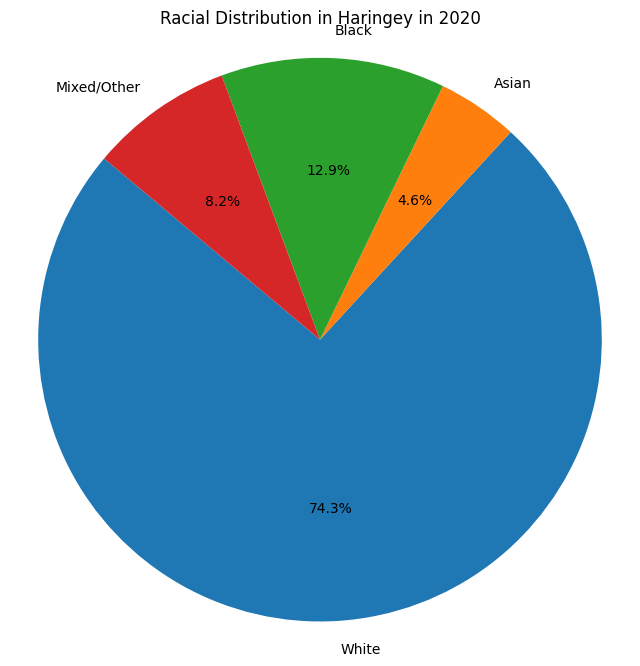

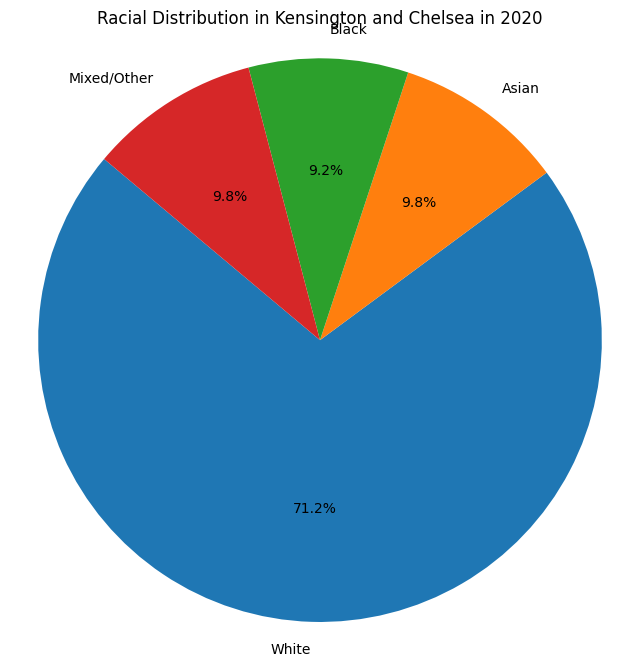

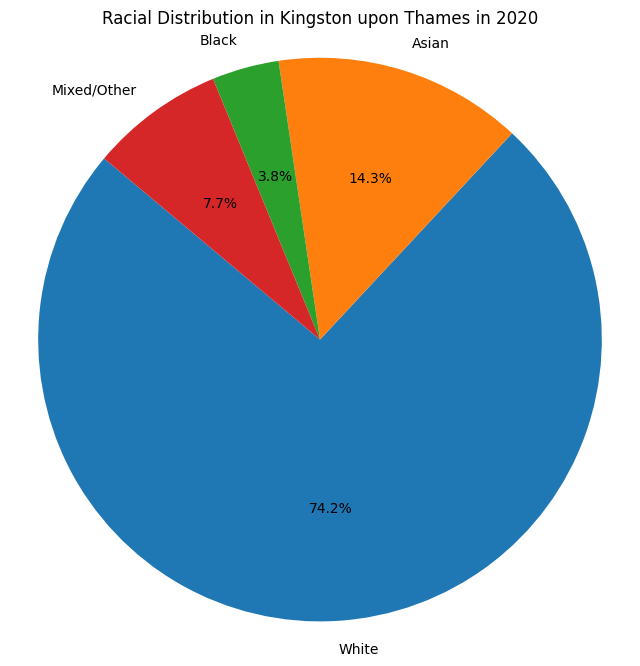

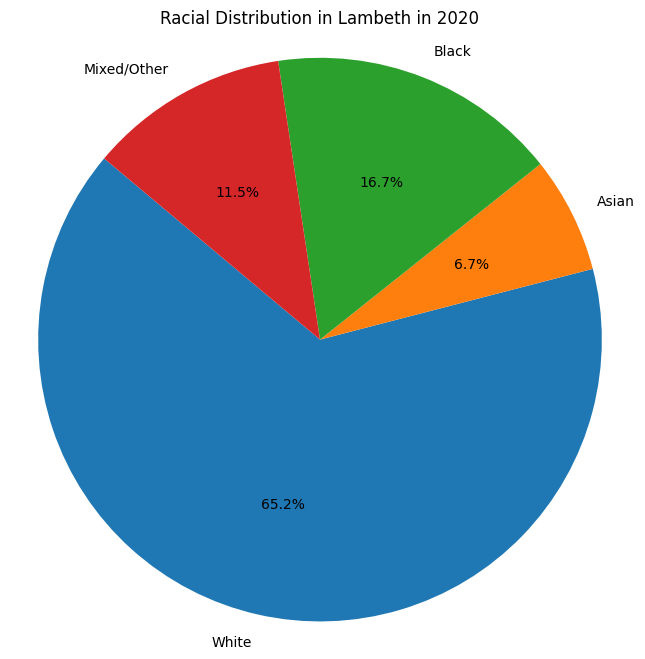

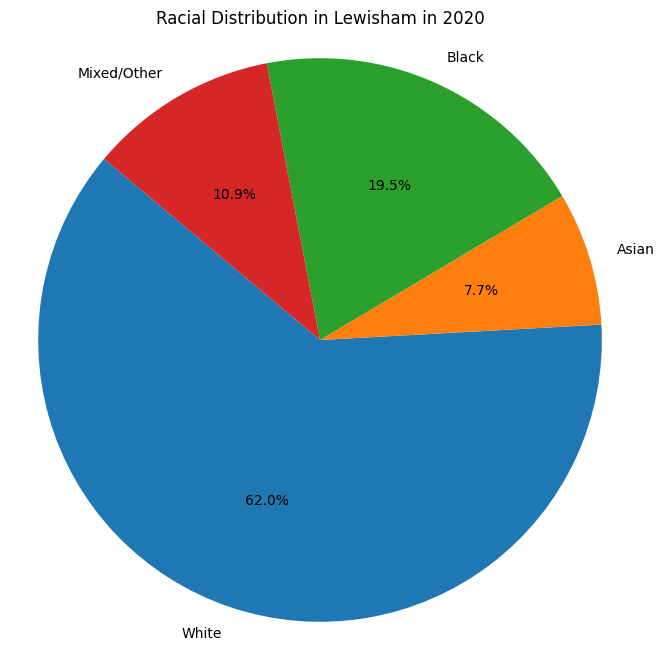

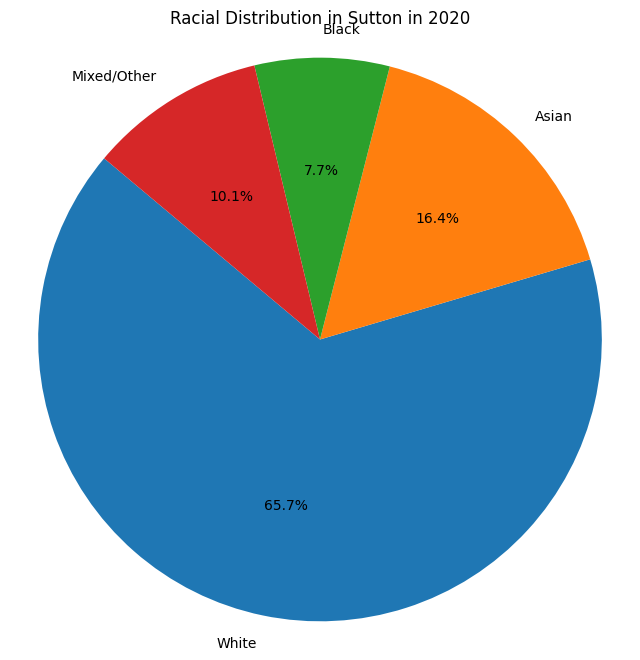

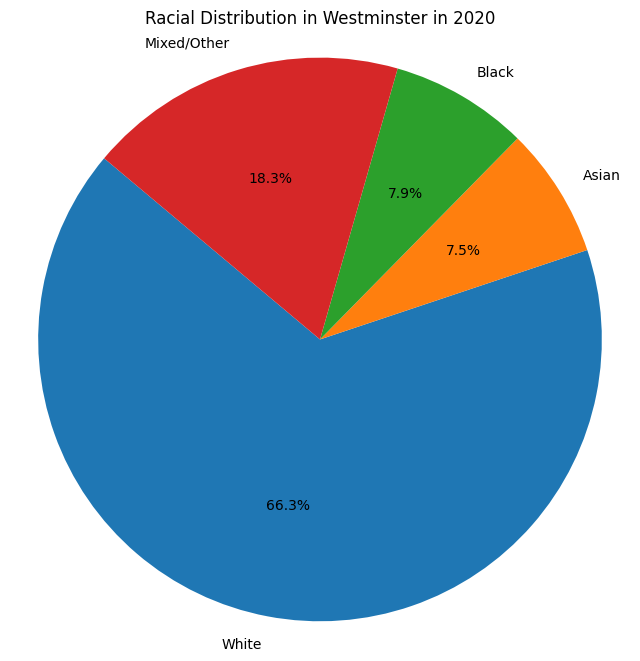

In [50]:
def create_pie_chart(borough_data):
    if borough_data['Area'] not in interest_bor:
        return
    labels = ['White', 'Asian', 'Black', 'Mixed/Other']
    sizes = [borough_data['White'], borough_data['Asian'], borough_data['Black'], borough_data['Mixed/Other']]
    
    plt.figure(figsize=(8, 8))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.title(f'Racial Distribution in {borough_data["Area"]} in 2020')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

for index, row in ethnic.iloc[1:, :].iterrows():
    create_pie_chart(row)